In [38]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import torch

import torchvision.datasets as dsets
import torchvision.transforms as trans

In [39]:
batch_size = 200

train_set = dsets.MNIST(root = '../data/mnist/',
                        transform= trans.ToTensor(),
                        train = True,
                        download = True)
test_set = dsets.MNIST(root = '../data/mnist/',
                       transform = trans.ToTensor(),
                       train = False,
                       download = True)

train_dl = torch.utils.data.DataLoader(train_set,
                                        batch_size = batch_size,
                                        shuffle = True,
                                        num_workers = 4)
test_dl = torch.utils.data.DataLoader(test_set,
                                        batch_size = batch_size,
                                        num_workers = 4)


In [40]:
from torch.optim import lr_scheduler

In [41]:
INPUT_DIM = 28 *28
N_CLASSES = 10
nsamples = 60000
lr = 5e-2
nepochs = 20

# 模型参数
w = torch.rand((INPUT_DIM, N_CLASSES), requires_grad = True)
b = torch.zeros((1,N_CLASSES), requires_grad = True)
#定义优化算法 Optimizer
optimizer = torch.optim.Adam([w,b], lr = lr)

#选择学习率下降策略
scheduler = lr_scheduler.MultiStepLR(optimizer, milestones = [10], gamma = 0.1)


In [42]:
# 定义损失函数
def Cost(x,y):
    pred_y = x.matmul(w) + b # (batch_size, N_CLASSES)
    diff = pred_y - y
    loss = diff.pow(2).mean()
    return loss

定义训练所需的辅助函数
- 用scatter将label转化成one-hot编码向量

In [43]:
x = torch.zeros(3,5)
index = torch.LongTensor([[1,2,0,0,1],[2,1,0,2,1]])
x.scatter_(0, index, 1)

print(index)
print(x)

tensor([[1, 2, 0, 0, 1],
        [2, 1, 0, 2, 1]])
tensor([[0., 0., 1., 1., 0.],
        [1., 1., 0., 0., 1.],
        [1., 1., 0., 1., 0.]])


In [44]:
def create_onehot(x,y):
    n = x.size(0)
    x = x.view(n,INPUT_DIM)
    
    y_onehot = torch.zeros(n, N_CLASSES)
    y_onehot.scatter_(1, y.view(-1,1), 1)
    y = y_onehot
    return x,y

In [45]:
import torch

num_classes = 5
y = torch.tensor([2, 1, 4])
print(y)
y_onehot = torch.zeros(y.size(0), num_classes)
print(y.view(-1,1))
y_onehot.scatter_(1, y.view(-1,1), 1)


tensor([2, 1, 4])
tensor([[2],
        [1],
        [4]])


tensor([[0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1.]])

In [46]:
x = torch.rand(2,28,28)
y = torch.LongTensor([[5],[1]])

x,y = create_onehot(x,y)
print(x.shape)
print(y)

torch.Size([2, 784])
tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])


In [47]:
def train_epoch(data_loader,optimizer):
    error_total = 0
    for batch_x, batch_y in data_loader:
        x,y = create_onehot(batch_x, batch_y)
        
        optimizer.zero_grad()
        loss = Cost(x,y)
        loss.backward() # W.grad, b.grad
        optimizer.step()
        
        error_total += loss.item()
    return error_total / len(data_loader)

In [48]:
for epoch in range(nepochs):
    scheduler.step()
    current_lr = scheduler.get_lr()[0] 
    error_train = train_epoch(train_dl, optimizer)
    print('Epoch: {}, Train Error: {:.4f}, lr: {:.4f}'.format(epoch, error_train, current_lr))

/Users/cheng/anaconda3/envs/pytorch/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:143: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
/Users/cheng/anaconda3/envs/pytorch/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:454: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Epoch: 0, Train Error: 46.6558, lr: 0.0500
Epoch: 1, Train Error: 0.3239, lr: 0.0500
Epoch: 2, Train Error: 0.1922, lr: 0.0500
Epoch: 3, Train Error: 0.1313, lr: 0.0500
Epoch: 4, Train Error: 0.0959, lr: 0.0500
Epoch: 5, Train Error: 0.0743, lr: 0.0500
Epoch: 6, Train Error: 0.0610, lr: 0.0500
Epoch: 7, Train Error: 0.0528, lr: 0.0500
Epoch: 8, Train Error: 0.0479, lr: 0.0500
Epoch: 9, Train Error: 0.0439, lr: 0.0005
Epoch: 10, Train Error: 0.0433, lr: 0.0050
Epoch: 11, Train Error: 0.0429, lr: 0.0050
Epoch: 12, Train Error: 0.0426, lr: 0.0050
Epoch: 13, Train Error: 0.0423, lr: 0.0050
Epoch: 14, Train Error: 0.0419, lr: 0.0050
Epoch: 15, Train Error: 0.0416, lr: 0.0050
Epoch: 16, Train Error: 0.0413, lr: 0.0050
Epoch: 17, Train Error: 0.0410, lr: 0.0050
Epoch: 18, Train Error: 0.0408, lr: 0.0050
Epoch: 19, Train Error: 0.0406, lr: 0.0050


In [49]:
def pred(x):
    pred_y = x.matmul(w) + b
    _,labels = pred_y.max(dim = 1)
    return labels


In [50]:
# 评价函数：计算准确率
def evaluate(data_loader):
    correct = 0
    total = 0
    for batch_x, batch_y in data_loader:
        x,y = create_onehot(batch_x, batch_y)
        pred_y = pred(x)
        correct += (pred_y == batch_y).float().sum()
        total += batch_x.size(0)
    accuracy = 100.0*correct / total
    return accuracy

In [51]:
evaluate(test_dl)

tensor(85.4600)

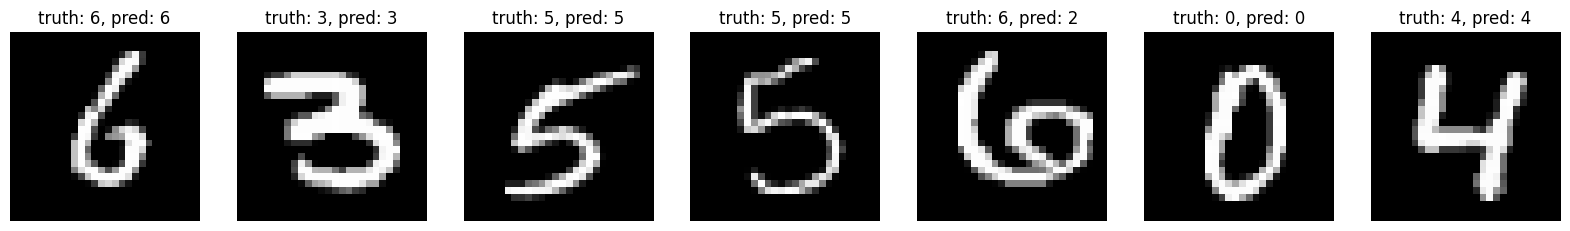

In [52]:
for X,y in test_dl:
    break
X = X.view(-1, 784)
pred_y = pred(X)

plt.figure(figsize = (20,5))
for i in range(7):
    plt.subplot(1,7,i+1)
    img = X[i+50].squeeze().view(28,28).numpy()
    plt.imshow(img,cmap='gray')
    plt.title(f'truth: {y[i+50]}, pred: {pred_y[i+50]}')
    plt.axis('off')

In [64]:
import torch 
import torch.nn as nn

import torchvision.datasets as dsets
import torchvision.transforms as trans 
from torch.optim import lr_scheduler

batch_size = 500
INPUT_DIM = 28 *28
N_CLASSES = 10
nepochs = 20
lr = 1e-1

In [65]:
train_set = dsets.MNIST(root = '../data/mnist/',
                        transform = trans.ToTensor(),
                        train = True)
test_set = dsets.MNIST(root = '../data/mnist/',
                       transform = trans.ToTensor(),
                          train = False)

train_dl = torch.utils.data.DataLoader(train_set,
                                        batch_size = batch_size,
                                        shuffle = True
                                        )
test_dl = torch.utils.data.DataLoader(test_set,
                                        batch_size = batch_size)

                                        
                        

逻辑回归模型

In [85]:
class LogisticRegression(nn.Module):
    def __init__(self, input_dim, out_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, out_dim)
        
    def forward(self, x):
        out = x.view(-1,784)
        out = self.linear(out)
        return out
    
model = LogisticRegression(INPUT_DIM, N_CLASSES)
print('网络结构如下:\n',model)

网络结构如下:
 LogisticRegression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)


In [86]:
# 交叉损失函数
criterion = nn.CrossEntropyLoss()
# 优化器
optimizer = torch.optim.Adam(model.parameters(), lr = lr)
scheduler = lr_scheduler.MultiStepLR(optimizer, milestones = [10], gamma = 0.2)

评价函数

In [88]:
def eval(model,criterion, data_loader):
    loss,accuracy = 0,0
    for bx, by in data_loader:
        logit = model(bx)
        err = criterion(logit, by)
        loss += err.item()
        
        
        _,pred_y = logit.max(dim = 1)
        accuracy += (pred_y.data == by).float().sum()/by.size(0)
        
    loss /= len(data_loader)
    accuracy /= len(data_loader)
    return loss, 100.0 * accuracy
        
    



In [89]:
for epoch in range(nepochs):
    scheduler.step()
    for bx, by in train_dl:
        optimizer.zero_grad()
        logit = model(bx)
        err = criterion(logit, by)
        err.backward()
        optimizer.step()
        
    loss_train, acc_train = eval(model, criterion,train_dl)
    loss_test, acc_test = eval(model, criterion,test_dl)
    print('Epoch: {}, Train Loss: {:.4f}, Train Acc: {:.2f}%, Test Loss: {:.4f}, Test Acc: {:.2f}%'.format(epoch, loss_train, acc_train, loss_test, acc_test))


/Users/cheng/anaconda3/envs/pytorch/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:143: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Epoch: 0, Train Loss: 0.3386, Train Acc: 91.61%, Test Loss: 0.3589, Test Acc: 91.35%
Epoch: 1, Train Loss: 0.3646, Train Acc: 90.38%, Test Loss: 0.4247, Test Acc: 89.61%
Epoch: 2, Train Loss: 0.3319, Train Acc: 91.70%, Test Loss: 0.3961, Test Acc: 91.04%
Epoch: 3, Train Loss: 0.3282, Train Acc: 91.90%, Test Loss: 0.4073, Test Acc: 91.44%
Epoch: 4, Train Loss: 0.3936, Train Acc: 90.13%, Test Loss: 0.4565, Test Acc: 89.66%
Epoch: 5, Train Loss: 0.3692, Train Acc: 91.32%, Test Loss: 0.4390, Test Acc: 90.86%
Epoch: 6, Train Loss: 0.3626, Train Acc: 91.42%, Test Loss: 0.4819, Test Acc: 90.16%
Epoch: 7, Train Loss: 0.3928, Train Acc: 90.36%, Test Loss: 0.5028, Test Acc: 89.56%
Epoch: 8, Train Loss: 0.3460, Train Acc: 91.91%, Test Loss: 0.4620, Test Acc: 90.91%
Epoch: 9, Train Loss: 0.2543, Train Acc: 93.60%, Test Loss: 0.3812, Test Acc: 91.92%
Epoch: 10, Train Loss: 0.2495, Train Acc: 93.30%, Test Loss: 0.3779, Test Acc: 91.59%
Epoch: 11, Train Loss: 0.2368, Train Acc: 93.65%, Test Loss: 0.3